# Federico Andrucci - 000105.... 

1. The data are split in two files, load the files and merge them
according to the first column, which is the index; both the files
contain a "class" column, keep both the columns in the merged
file calling them "class_x" and "class_y" (you can use the merge
function of pandas dataframes) (4pt)
2. Delete all the rows where class_x is different from class_y, then
drop class_y and rename class_x as class (4pt)
3. Reorder the columns in alphabetical order, but placing the class
column as the last one; the cleaned dataframe must be named
df; show its size and head (4pt)
4. Find the best classification scheme using three classification
methods
5. For each classification method find the best parameter setting
with cross validation on the training set (6pt)
6. For each classification method compute the accuracy and the
confusion matrix on the test set (4pt)
7. Produce a plot of the accuracies given by the methods
attempted (3pt)

In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Variables
first_file_name = 'exam_1.csv'
second_file_name = 'exam_2.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

## 1. The data are split in two files, load the files and merge them according to the first column, which is the index; both the files contain a "class" column, keep both the columns in the merged file calling them "class_x" and "class_y" (you can use the merge function of pandas dataframes) (4pt)

In [28]:
# load the first file
first_df = pd.read_csv(first_file_name, delimiter=separator, index_col=0)

# load the second file
second_df = pd.read_csv(second_file_name, delimiter=separator, index_col=0)

# merge the dataframe
df = first_df.merge(second_df, how='outer', left_index=True, right_index=True, suffixes=('_x', '_y'))

## 2. Delete all the rows where class_x is different from class_y, then drop class_y and rename class_x as class (4pt)

In [29]:
# Find all the indexes of the row where class_x is different from class_y
indexes_to_delete = df[df['class_x'] != df['class_y']].index

# drop those rows from dataframe
df = df.drop(index=indexes_to_delete, axis=0)

# drop class_y
df = df.drop(labels='class_y', axis=1)

# rename class_x as class
df = df.rename(columns={'class_x': 'class'})

## 3. Reorder the columns in alphabetical order, but placing the class column as the last one; the cleaned dataframe must be named df; show its size and head (4pt)

In [30]:
class_column = 'class'

# get the column names
column_names = list(df.columns)

# remove the class column
column_names.remove(class_column)

# sort the values
column_names.sort()

# append class because we want it last
column_names.append(class_column)

# reindex the dataframe
df = df.reindex(columns=column_names)

In [31]:
# Show the size of the dataframe
print(f"The dataframe has size: {df.size}")

The dataframe has size: 13888


In [32]:
# Show the head of the dataframe
df.head()

,A,B,C,D,E,F,class
0,-0.386248,-1.432057,1.536628,1.039420,1.232589,0.280469,1
1,-2.686649,-4.036329,4.640702,0.526320,0.823433,-0.419013,1
2,0.474124,0.179770,1.576616,0.157974,-1.256234,-0.162869,0
3,-1.343790,-1.299109,-0.514008,-0.152250,1.520392,0.045123,2
4,-2.187600,-2.089699,0.289041,-0.494995,1.318321,-0.661858,2


## 4. Find the best classification scheme using three classification methods

We will use `DecisionTree`, `LinearPerceptron`, and `K-nearest Neighbors`

Let's start by dividing our dataset into feature matrix and class labels

In [33]:
X = df.drop(class_column, axis=1)
y = df[class_column]

We will now split the data into a trainig and a test set in order to see how well the classifiers perform.

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state)

### Decision Tree

In [35]:
# Instantiate the DecisionTree classifier
dt = DecisionTreeClassifier(random_state=random_state)

# fit it to the training set
dt.fit(Xtrain, ytrain)

# try to predict training data
dt_train_prediction = dt.predict(Xtrain)

# try to predict test data
dt_test_prediction = dt.predict(Xtest)

# compute the accuracy score
dt_train_accuracy = accuracy_score(ytrain, dt_train_prediction) * 100
dt_test_accuracy = accuracy_score(ytest, dt_test_prediction) * 100

## Linear Perceptron

In [36]:
# Instantiate the LinearPerceptron
lp = Perceptron(random_state=random_state)

# Fit it to the training set
lp.fit(Xtrain, ytrain)

# Try to predicti training data
lp_train_prediction = lp.predict(Xtrain)

# Try to predict test data
lp_test_prediction = lp.predict(Xtest)

# compute the accuracy score
lp_train_accuracy = accuracy_score(ytrain, lp_train_prediction) * 100
lp_test_accuracy = accuracy_score(ytest, lp_test_prediction) * 100

## K-nearest Neighbors

In [37]:
# Instantiate the KNN classifier 
knn = KNeighborsClassifier()

# Fit it to the training set
knn.fit(Xtrain, ytrain)

# Try to predicti training data
knn_train_prediction = knn.predict(Xtrain)

# Try to predict test data
knn_test_prediction = knn.predict(Xtest)

# compute the accuracy score
knn_train_accuracy = accuracy_score(ytrain, knn_train_prediction) * 100
knn_test_accuracy = accuracy_score(ytest, knn_test_prediction) * 100

Let's see how well the classifiers have performed using their default hyperparameters

In [38]:
print(f"The decision tree had an accuracy of {dt_train_accuracy:.2f} on the training set and {dt_test_accuracy:.2f} on the test set")
print(f"The linear perceptron had an accuracy of {lp_train_accuracy:.2f} on the training set and {lp_test_accuracy:.2f} on the test set")
print(f"The knn classifier had an accuracy of {knn_train_accuracy:.2f} on the training set and {knn_test_accuracy:.2f} on the test set")

The decision tree had an accuracy of 100.00 on the training set and 81.85 on the test set
The linear perceptron had an accuracy of 74.13 on the training set and 74.80 on the test set
The knn classifier had an accuracy of 90.32 on the training set and 88.10 on the test set


The linear perceptron behave very oddly, having a higher accuracy on the test set. The KNN classifier behave the best overall, reaching a higher accuracy on the test set. The decision tree shows sign of overfitting.

## 5. For each classification method find the best parameter setting with cross validation on the training set (6pt)

In [42]:
model_lbls = [
              'dt', 
              'lp', 
             'knn',
            ]

score = 'precision'

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': list(range(1,dt.get_depth() + 1)), 'random_state': [random_state]}]
tuned_param_lp = [{'early_stopping': [True], 'random_state': [random_state]}]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
       },
}

In [43]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print()

We will now iterate on the models with GridSearchCV to find which one is the best performing

In [44]:
results_short = {}

for m in model_lbls:
    print('-'*40)
    print("Trying model {}".format(models[m]['name']))
    clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                        scoring='%s_macro' % score,  
                        return_train_score = False,
                        n_jobs = 2,
                    )
    
    clf.fit(Xtrain, ytrain)
    print_results(clf)
    results_short[m] = clf.best_score_
    
print("Summary of results for {}".format(score))
print("Estimator")
for m in results_short.keys():
    print("{}\t - score: {:5.2f}%".format(models[m]['name'], results_short[m]*100))

----------------------------------------
Trying model Decision Tree       


/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/federyeeco/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Best parameters set found on train set:

{'max_depth': 7, 'random_state': 42}

Grid scores on train set:

0.432 (+/-0.022) for {'max_depth': 1, 'random_state': 42}
0.814 (+/-0.040) for {'max_depth': 2, 'random_state': 42}
0.814 (+/-0.043) for {'max_depth': 3, 'random_state': 42}
0.826 (+/-0.039) for {'max_depth': 4, 'random_state': 42}
0.815 (+/-0.050) for {'max_depth': 5, 'random_state': 42}
0.827 (+/-0.045) for {'max_depth': 6, 'random_state': 42}
0.833 (+/-0.056) for {'max_depth': 7, 'random_state': 42}
0.828 (+/-0.045) for {'max_depth': 8, 'random_state': 42}
0.825 (+/-0.033) for {'max_depth': 9, 'random_state': 42}
0.830 (+/-0.041) for {'max_depth': 10, 'random_state': 42}
0.822 (+/-0.045) for {'max_depth': 11, 'random_state': 42}
0.827 (+/-0.054) for {'max_depth': 12, 'random_state': 42}
0.823 (+/-0.053) for {'max_depth': 13, 'random_state': 42}
0.811 (+/-0.042) for {'max_depth': 14, 'random_state': 42}
0.816 (+/-0.039) for {'max_depth': 15, 'random_state': 42}
0.813 (+/-0.041) f

As we can see, the KNN classifier performed once again the best, followed by the decision tree and the linear perceptron

## 6. For each classification method compute the accuracy and the confusion matrix on the test set (4pt)

In [45]:
dt = DecisionTreeClassifier(max_depth=7, random_state=random_state)
lp = Perceptron(early_stopping=True, random_state=random_state)
knn = KNeighborsClassifier(n_neighbors=9)

### DecisionTree

In [46]:
dt.fit(Xtrain, ytrain)
dt_pred = dt.predict(Xtest)
dt_accuracy = accuracy_score(ytest, dt_pred)* 100
dt_cm = confusion_matrix(ytest, dt_pred)

In [47]:
print(f"The accuracy score of the DT classifier is {dt_accuracy:.2f}%")

The accuracy score of the DT classifier is 82.46%


In [48]:
print("The DT confusion matrix is:")
print(dt_cm)

The DT confusion matrix is:
[[120  18  14]
 [ 23 134  16]
 [ 10   6 155]]


### LinearPerceptron

In [49]:
lp.fit(Xtrain, ytrain)
lp_pred = lp.predict(Xtest)
lp_accuracy = accuracy_score(ytest, lp_pred)* 100
lp_cm = confusion_matrix(ytest, lp_pred)

In [50]:
print(f"The accuracy score of the LP classifier is {lp_accuracy:.2f}%")

The accuracy score of the LP classifier is 79.44%


In [51]:
print("The LP confusion matrix is:")
print(lp_cm)

The LP confusion matrix is:
[[ 97  32  23]
 [ 21 147   5]
 [  6  15 150]]


### KNN

In [52]:
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)
knn_accuracy = accuracy_score(ytest, knn_pred)* 100
knn_cm = confusion_matrix(ytest, knn_pred)

In [53]:
print(f"The accuracy score of the KNN classifier is {knn_accuracy:.2f}%")

The accuracy score of the KNN classifier is 86.29%


In [54]:
print("The KNN confusion matrix is:")
print(knn_cm)

The KNN confusion matrix is:
[[122  18  12]
 [ 13 145  15]
 [  6   4 161]]


### 7. Produce a plot of the accuracies given by the methods attempted (3pt)

<BarContainer object of 3 artists>

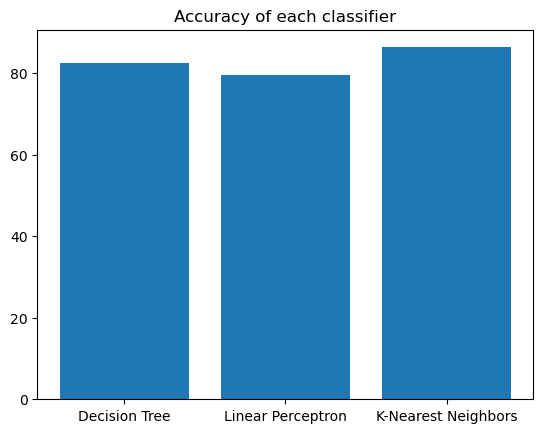

In [55]:
classifier_list = ['Decision Tree', 'Linear Perceptron', 'K-Nearest Neighbors']
acc_list = [dt_accuracy, lp_accuracy, knn_accuracy]
plt.title('Accuracy of each classifier')
plt.bar(classifier_list, acc_list)